In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv("algerian_forest_cleaned.csv")

In [3]:
# Getting the top 5 records

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
# Getting sample of 10 records

df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
186,5,8,2012,34,42,17,0.1,88.3,23.6,52.5,19.0,23.5,12.6,fire,2
181,31,7,2012,37,55,15,0.0,89.3,28.3,67.2,8.3,28.3,14.5,fire,2
71,11,8,2012,35,63,13,0.0,88.9,21.7,77.0,7.1,25.5,12.1,fire,1
206,25,8,2012,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,fire,2
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
157,6,7,2012,35,42,15,0.3,84.7,15.5,45.1,4.3,16.7,6.3,fire,2
161,10,7,2012,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,not fire,2
179,29,7,2012,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,fire,2
231,19,9,2012,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,fire,2
26,27,6,2012,34,53,18,0.0,89.0,21.6,80.3,9.2,25.8,15.0,fire,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [6]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
## drop the year month year columns

df=df.drop(['day', 'month', 'year'],axis=1)

#or

# df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [10]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [11]:
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

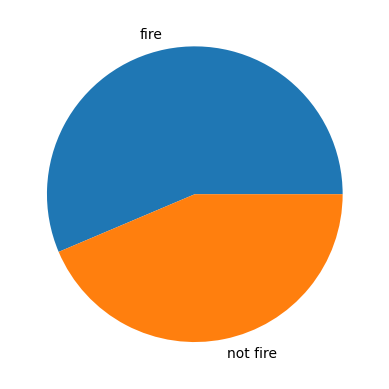

In [12]:
import seaborn as sns

plt.pie(df["Classes"].value_counts(),labels=["fire","not fire"])

plt.show()

In [13]:
# encoding the categorical feature

# df["Classes"]=np.where(df["Classes"]=="not fire",0,1)

# or

df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [14]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [15]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [16]:
## Take FWI as an dependent feature and all remaining features as independent features

## find the correlation values inorder to understand the correlation between the features

df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [17]:
## As we can see there is positive correlation between temparature, Ws, FFMC,DMC,DC,ISI,BUI,Classes,Region and FWI (independent feature)
## RH and Rain is negatively correlated (we can drop these columns as well)
## Region is positively correlated but less correlated (0.1972)

In [18]:
## Set the independent and dependent feature

X=df.drop("FWI",axis=1)
y=df["FWI"]

In [19]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,2


In [20]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
X_train.shape

(182, 11)

In [22]:
y_train.shape

(182,)

In [23]:
X_test.shape

(61, 11)

In [24]:
## feature selection based on the correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


### Multicollinearity means 

If we have 3 features f1, f2, f3. f1 and f2 are the independent features and the f3 is dependent feature.

As per our check from the correlation values we observed that f1 and f2 are 90% correlated i,e 0.9 correlated (or -0.9) that means both f1 and f2 are strongly correlated (if f1 increases and f2 also increases ) (if -0.9 that means if f1 dec then f2 also dec) and palying the same amount of role to predict the dependent feature (f1 and f2 are collinear) As both the features has same amount of correlation to predict the output feature we will use one feature either f1 or f2 to predict the output feature and will drop the other feature to avoid multi-collinearity problem.

Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model. This means that one independent variable can be predicted from another in a regression model

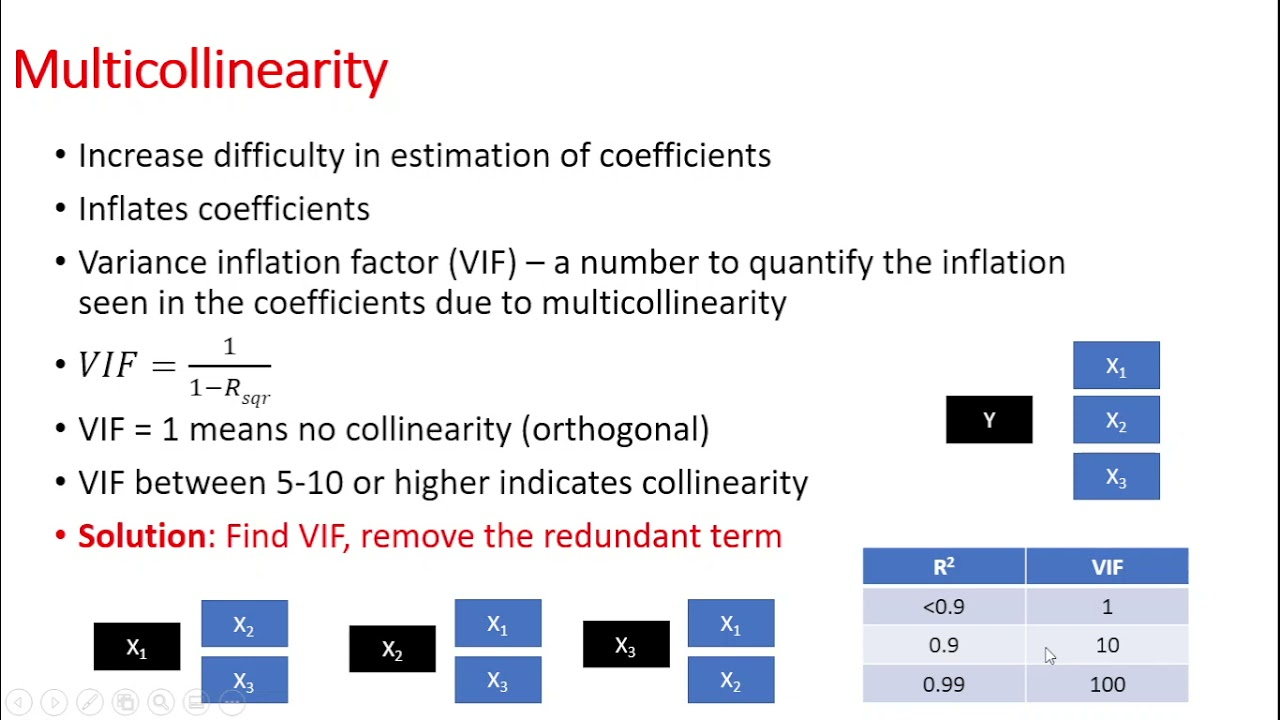

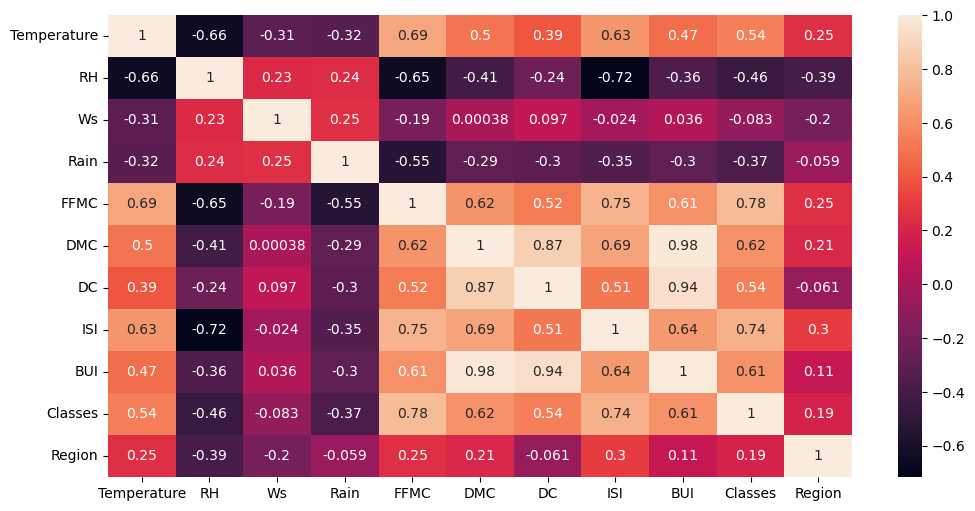

In [25]:
## checking the multicollinearity using correlation values

plt.figure(figsize=(12,6))

sns.heatmap(X_train.corr(),annot=True)

plt.show()

### Example:

For an instance **assume** if you have correlation of features Temperature and Rain is 0.90 i,e (90%) (strong positively correlated).

Correlation value will be set by **Domain expert**, In this example the domain expert set the MAX correlation value as 90%.

So we will consider the **features which are correlated 90% and will drop the one or multiple features to avoid multi-collinearity**

As the both features Temperature and Rain are strongly 90% correlated, we will drop one of the feature either Temperature and Rain.

In [26]:
X_train.corr().columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [27]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [28]:
X_train.corr().iloc[2,3] # 2nd index row 3rd index column (Ws vs Rain)

0.25193172257821067

In [29]:
X_train.corr().iloc[0,4] # correlation value of 0th index row and 4th index column (Temperature vs FFMC)

0.6947684187383468

In [30]:
# Filtering the features based on the correlation threshold value set by domain expert

def corr(dataset,threshold):
    corr_col=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
#             print(i,j)
            if(abs(corr_mat.iloc[i,j]>threshold)):
                col= corr_mat.columns[i]
                corr_col.add(col)
    return corr_col

In [31]:
# Domain expert provided the threshold value as 0.85

corr(X_train,0.85)

# We need to avoid considering the features (dropping features) which are having correlation value >0.85 to avoid multicollin
# -earity problem.

# BUI is highly correlated with DMC and DC as well so we dropped BUI and DC

{'BUI', 'DC'}

In [32]:
col_features=corr(X_train,0.85)

In [33]:
# dropping the features which are having >0.85 correlation from train and test dataset

X_train.drop(list(col_features),axis=1,inplace=True)

# X_train.drop(col_features,axis=1,inplace=True) # It will also works fine

X_test.drop(list(col_features),axis=1,inplace=True)

In [34]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,1
141,31,72,14,0.2,60.2,3.8,0.8,0,2
192,40,31,15,0.0,94.2,22.5,16.6,1,2
68,32,60,18,0.3,77.1,11.3,2.2,0,1
119,32,47,14,0.7,77.5,7.1,1.8,0,1
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,1
14,28,80,17,3.1,49.4,3.0,0.4,0,1
92,25,76,17,7.2,46.0,1.3,0.2,0,1
179,34,59,16,0.0,88.1,19.5,7.4,1,2


In [35]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
X_train_scaled # scaled data

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plots to understand the effects of standard scaler

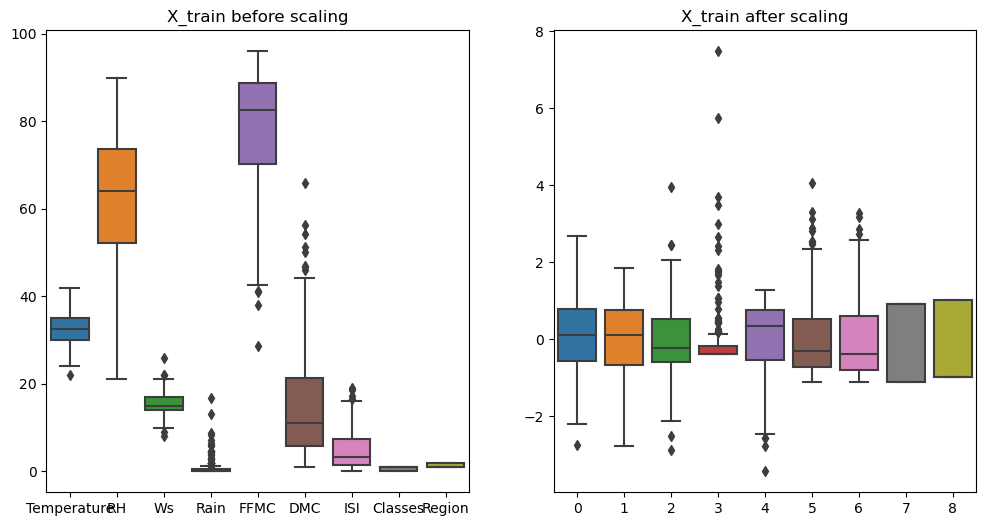

In [38]:
plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")
plt.show()

# In the first picture, the ranges of data is wide (0 to 100)
# In second picture, the range of the data is within (-2 to 8 ) scale

## Linear regression model training

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lrm=LinearRegression()
lrm.fit(X_train_scaled,y_train) # fitting the data
y_pred= lrm.predict(X_test_scaled) # Predicted the output for test values

### Accuracy metrics

In [40]:
mae= mean_absolute_error(y_test,y_pred)
r2_score= r2_score(y_test,y_pred)
print("Mean absolute error: ",mae) # error is 0.54 
print("R2- Score: ",r2_score) # we are getting 98% accuracy --> good 

Mean absolute error:  0.5468236465249976
R2- Score:  0.9847657384266951


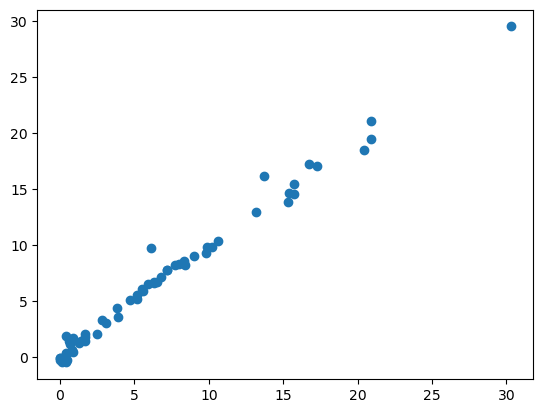

In [41]:
plt.scatter(y_test,y_pred)

# Linear relationship means our models done good job

# Linear means our y_test and y_pred values are natching (model is predicting the correct values)

## Lasso Regression (L1 - Regression)

In [42]:
# Lasso regression module with default hyper parameters

# class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,
#                                  warm_start=False, positive=False, random_state=None, selection='cyclic')[source]

# alphafloat, default=1.0
# Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).

# When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. 
# For numerical reasons, using alpha = 0 with the Lasso object is not advised. Instead, you should use the LinearRegression object.

In [43]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train) # fitting the data
y_pred_lasso= lasso.predict(X_test_scaled) # Predicted the output for test values

In [44]:
# Accuracy metrics

mae= mean_absolute_error(y_test,y_pred_lasso)
r2_score= r2_score(y_test,y_pred_lasso)
print("Mean absolute error: ",mae) # error is 0.54 
print("R2- Score: ",r2_score) # we are getting 98% accuracy --> good 

Mean absolute error:  1.1331759949144085
R2- Score:  0.9492020263112388


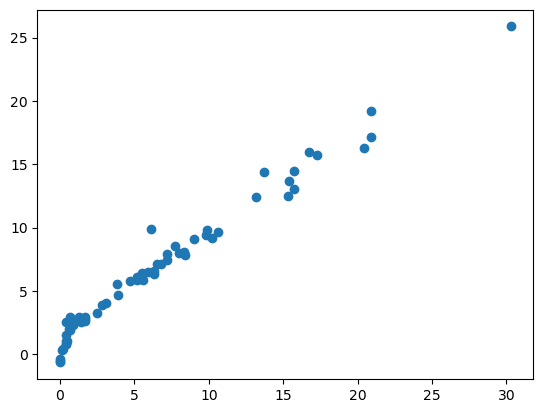

In [45]:
plt.scatter(y_test,y_pred_lasso)

# Linear relationship means our models done good job

# Linear means our y_test and y_pred values are matching (model is predicting the correct values)

## Cross validation 

As we know our dataset is splitted into train, test dataset. And training data further divided into validation data set.

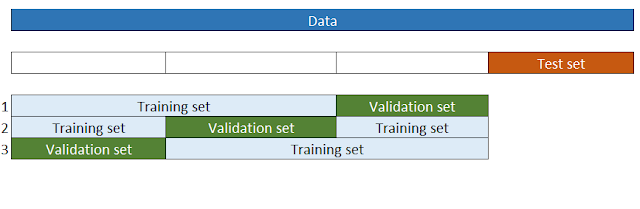

Validation dataset is used to tune the **hyper-parameters** (Hyoer-parameter tuning)

**Hyperparameters means:** The parameters which are initialized while training the model.

class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,warm_start=False, positive=False, random_state=None, selection='cyclic')
                                 
**The below paramaters are considered as the hyperparameters for above lasso regression model:**

alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,
                                 warm_start=False, positive=False, random_state=None, selection='cyclic'

A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.

The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.

For example if you have 1000 training data points and you taken cv=5 (cross validation=5 times) then, 1000 datapoints will divided into 1000/5 = 200.

As we considered cv=5, 

at cv=1 instance, the first 200 points (0th index to 199th index) of training data will be considered to train the model (to tune hyper parameter) and the remianing 800 points are considered as training data and we will find the accuracy. (Let's say it is accuracy1)

at cv=2 instance, another 200 points (200th index to 399th index) of training data will be considered to train the model (to tune hyper parameter) and the remianing 800 points are considered as training data and we will find the accuracy. (Let's say it is accuracy2)

at cv=3 instance, another 200 points (400th index to 599th index) of training data will be considered to train the model (to tune hyper parameter) and the remianing 800 points are considered as training data and we will find the accuracy. (Let's say it is accuracy3)

at cv=4 instance, another 200 points (600th index to 799th index) of training data will be considered to train the model (to tune hyper parameter) and the remianing 800 points are considered as training data and we will find the accuracy. (Let's say it is accuracy4)

at cv=5 instance, another 200 points (800th index to 999th index) of training data will be considered to train the model (to tune hyper parameter) and the remianing 800 points are considered as training data and we will find the accuracy. (Let's say it is accuracy5)

In every cross validation,  the training and validation datapoints are changing and we got a different accuracy at each cross validation. Validation dataset is used tune the hyper parameters and the final accuracy of the model will be the average of 5 accuaracy's:

Final accuracy= (accuracy1+ accuracy2+ accuracy3+accuracy4+accuracy5)/5

## Cross Validation in Lasso

In [46]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

# While fitting, it will tune the hyperparameter values as well using cross validation concept

# Hyperparameters means alpha etc.,

LassoCV(cv=5)

In [47]:
lassocv.alpha_

0.05725391318234408

In [48]:
# lassocv.alphas_

# lassocv.mse_path_

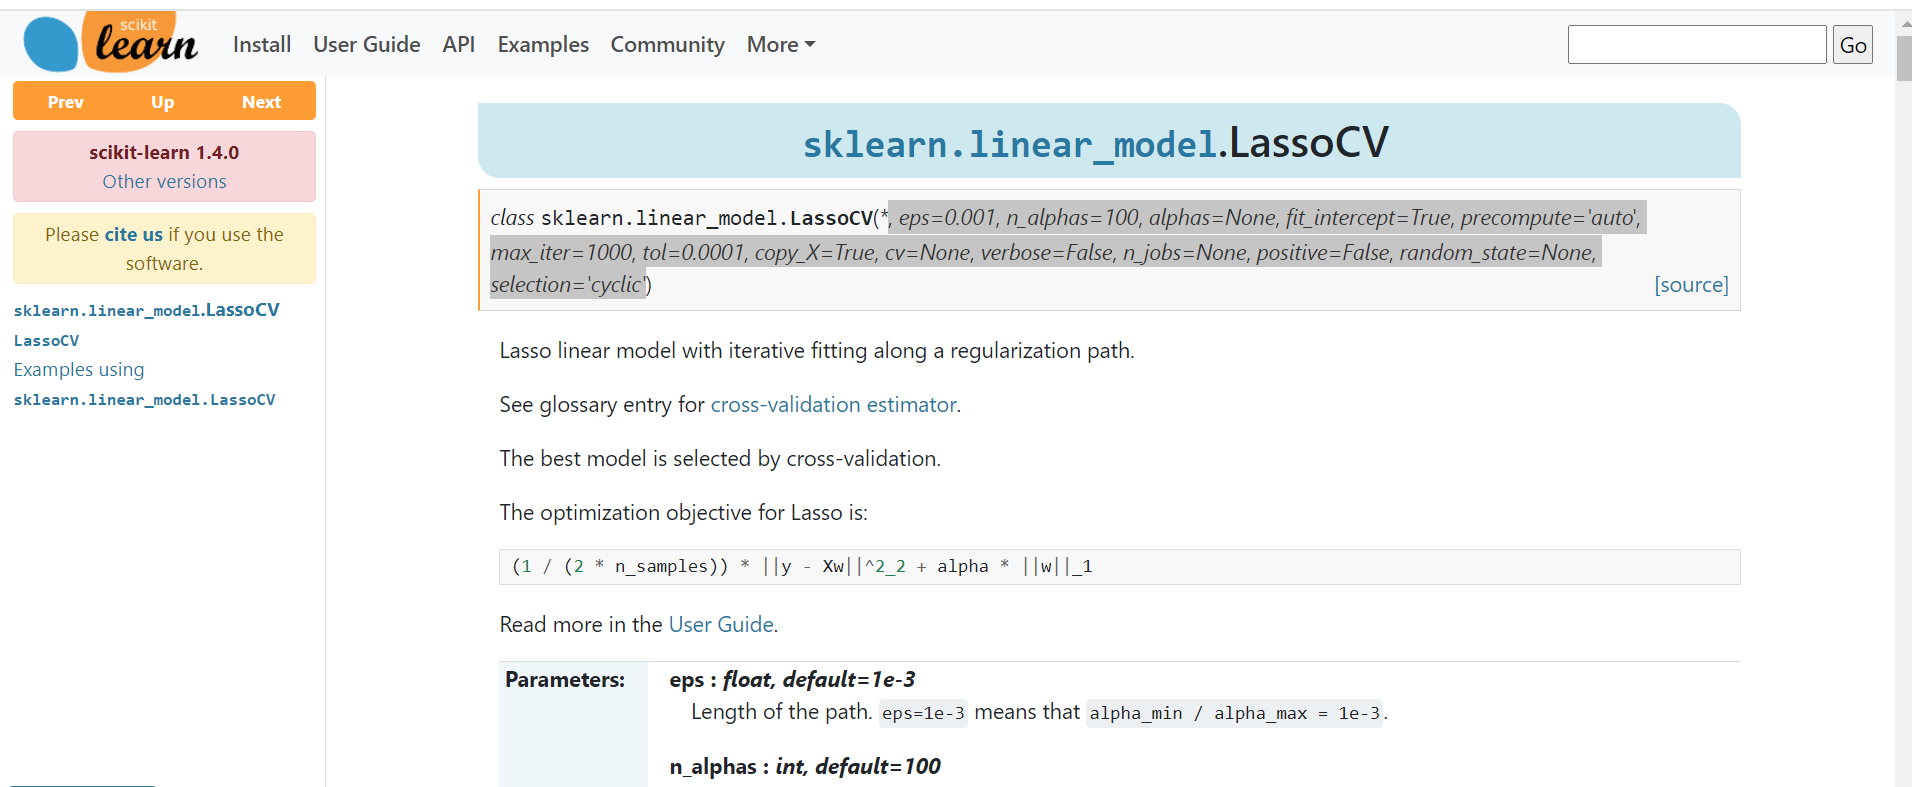

In [66]:
# best hyperparameters selected by the lassocv after cross validation.

lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [49]:
from sklearn.metrics import mean_absolute_error,r2_score

y_pred=lassocv.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
r2_score= r2_score(y_pred,y_test)
print("Mean absolute error: ",mae) 
print("R2- Score: ",r2_score)  # 0.98 which is very good

Mean absolute error:  0.6199701158263431
R2- Score:  0.980851982434192


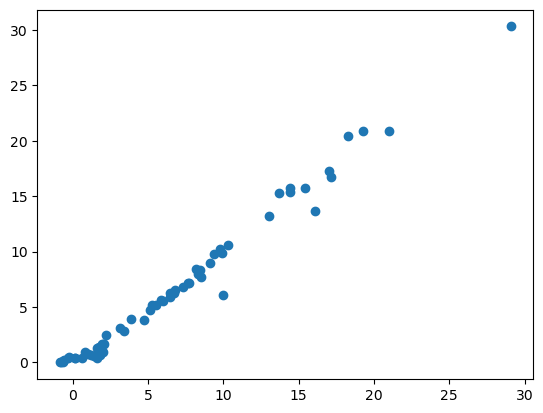

In [50]:
plt.scatter(y_pred,y_test) # Linear relationship (model performing very well)

## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train) # fitting the data
y_pred= ridge.predict(X_test_scaled) # Predicted the output for test values

In [52]:
# Accuracy metrics

mae= mean_absolute_error(y_test,y_pred)
r2_score= r2_score(y_test,y_pred)
print("Mean absolute error: ",mae) # error is 0.56
print("R2- Score: ",r2_score) # we are getting 98% accuracy --> good 

Mean absolute error:  0.5642305340105693
R2- Score:  0.9842993364555513


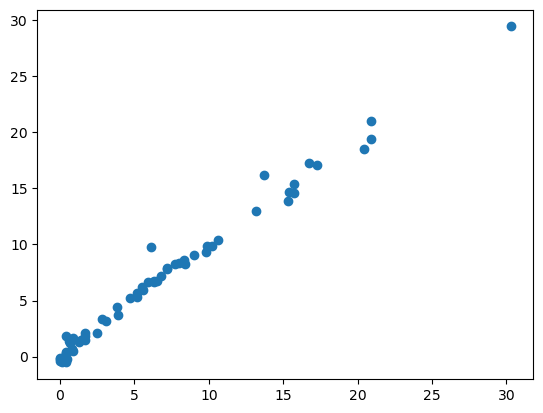

In [53]:
plt.scatter(y_test,y_pred)

### Cross validation in Ridge regression

In [54]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

# While fitting, it will tune the hyperparameter values as well using cross validation concept

# Hyperparameters means alpha etc.,

RidgeCV(cv=5)

In [55]:
from sklearn.metrics import mean_absolute_error,r2_score

y_pred=ridgecv.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
r2_score= r2_score(y_pred,y_test)
print("Mean absolute error: ",mae) 
print("R2- Score: ",r2_score)  # 0.98 which is very good

Mean absolute error:  0.5642305340105693
R2- Score:  0.9834070933284212


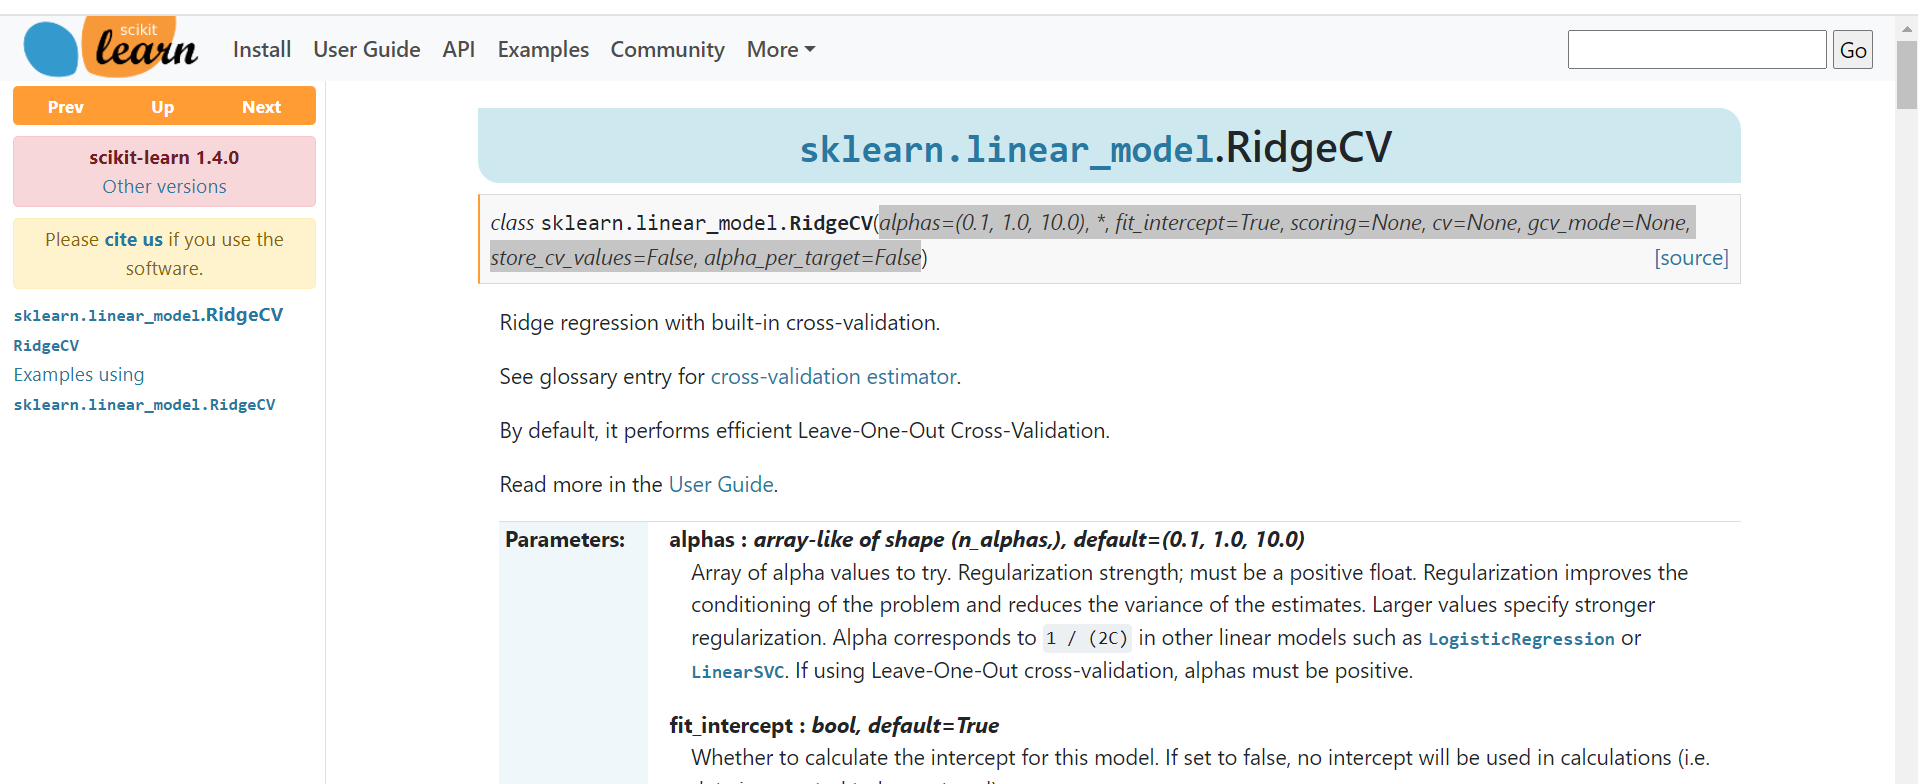

In [64]:
ridgecv.get_params()

# ridge cv selected the best hyper parameters using cross validation.

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

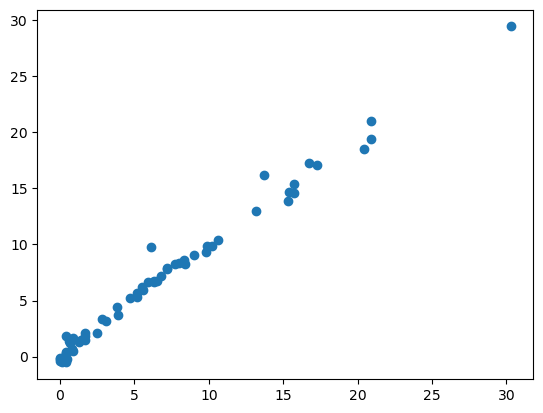

In [62]:
plt.scatter(y_test,y_pred)

## Elasticnet regression

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

In [80]:
## Accuracy metrics
from sklearn.metrics import mean_absolute_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
r2_score= r2_score(y_test,y_pred)

print("Mean absolute error : ",mae)
print("R2-Score: ",r2_score) # Less r2_score

Mean absolute error :  1.8822353634896
R2-Score:  0.8753460589519703


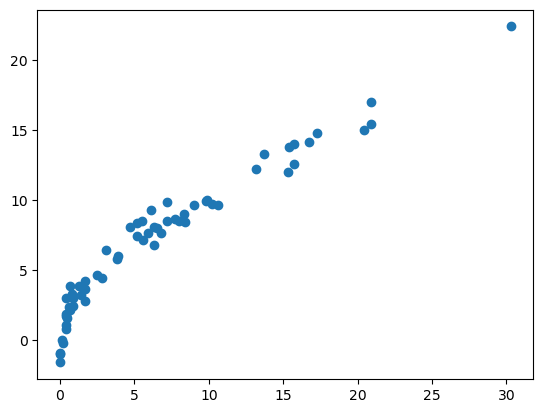

In [81]:
plt.scatter(y_test,y_pred)

## Cross validation in the elasticnet regression

In [75]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
elasticcv=ElasticNetCV()
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)

In [76]:
## Accuracy metrics
from sklearn.metrics import mean_absolute_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
r2_score= r2_score(y_test,y_pred)

print("Mean absolute error : ",mae)
print("R2-Score: ",r2_score) 

Mean absolute error :  0.6575946731430904
R2-Score:  0.9814217587854941


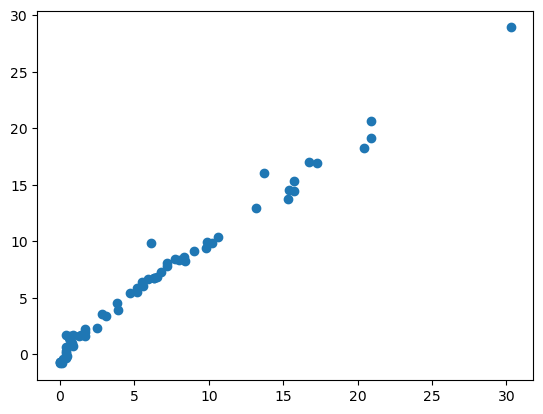

In [78]:
plt.scatter(y_test,y_pred)

# Pickling the model

In Python, the “pickle” module provides a way to serialize and deserialize Python objects, including trained machine learning models. By saving a trained model using the pickle module, you can reuse the model for making predictions on new data, without having to retrain the model from scratch.

In [82]:
## Till now we have trained the all the regression models and they provide good accuracy

## Out of all models, Ridge regression provided the good accuracy with r2-score (0.98), Let's create the pikle file for ridge re
# -gression model so that in future we don't need to develop the whole algorithm again and agian. We can use the pickle file of
# ridge regression model to predict the outputs on new data.

# Let's pickle the pre-processing model (StandardScaler) as well (It is used to pre-process the data with the trained data 
# parameters like mean and standard deviation) 


In [83]:
# Pickling the machine learning model and pre-processing model (standardization model)

scaler # standardization object

StandardScaler()

In [84]:
ridge # ridge model

Ridge()

In [85]:
import pickle

pickle.dump(scaler,open("scaler.pkl","wb"))

pickle.dump(ridge,open("ridge.pkl","wb"))

## we can use these pickle files to deploy in the cloud environment

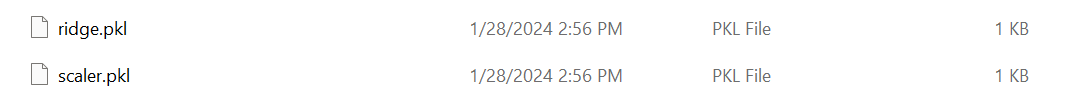

In [ ]:
#<--------------------------------------------------- THE END ---------------------------------------------------------------->